In [1]:
import time
import datetime
import math
import subprocess
import sys

In [2]:
import pandas as pd
import pickle
import matplotlib as plt
from IPython.display import display
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

In [3]:
import numpy as np

In [4]:
ro_dtc_part_full = pd.read_csv('C:/Projects/FCSD/FNOP/ML-AI meeting/DTC correlation study/GUDB_part_to_DTC_by_repair_date_2018-21_F150_full_base.csv')

In [5]:
ro_dtc_part_full.head()

vin  model_year        engine        full_part_number  \
0  1FTEW1C41KKE46643  2019        3.5L V6 GTDI  JL3Z5E212A               
1  1FTEW1C41KKE46643  2019        3.5L V6 GTDI  JL3Z5E212A               
2  1FTEW1C41KKE46643  2019        3.5L V6 GTDI  JL3Z5E212A               
3  1FTEW1C41KKE46643  2019        3.5L V6 GTDI  JL3Z5E212H               
4  1FTEW1C41KKE46643  2019        3.5L V6 GTDI  JL3Z5E212H               

  part_base     ro_date           ecu_dtc  
0  5E212     2020-09-24  0x7E0_P0430_0x00  
1  5E212     2020-09-24  0x7E0_P0420_0x00  
2  5E212     2020-09-24  0x706_C1001_0x97  
3  5E212     2020-09-24  0x7E0_P0430_0x00  
4  5E212     2020-09-24  0x7E0_P0420_0x00

In [6]:
#strip whitespace from column
ro_dtc_part_full['part_base'] = ro_dtc_part_full['part_base'].str.strip()
ro_dtc_part_full['full_part_number'] = ro_dtc_part_full['full_part_number'].str.strip()
ro_dtc_part_full['ecu_dtc'] = ro_dtc_part_full['ecu_dtc'].str.strip()

### Filter to select base part noumbers only

In [7]:
# base part nos in charging and fuel subsystem only
bp_list = ['10346','15604','9F972','9G756','9F593','9H307','9D370','9F479','12A650','10C679','14A068']

In [8]:
ro_dtc_part_full = ro_dtc_part_full[ro_dtc_part_full['part_base'].isin(bp_list)]

In [9]:
ro_dtc_part_full

vin  model_year                          engine  \
17      1FTEW1C49KKC99052  2019        3.5L V6 GTDI                     
18      1FTEW1C49KKC99052  2019        3.5L V6 GTDI                     
21      1FTEW1C49KKC99052  2019        3.5L V6 GTDI                     
22      1FTEW1C49KKC99052  2019        3.5L V6 GTDI                     
23      1FTEW1C49KKC99052  2019        3.5L V6 GTDI                     
24      1FTEW1C49KKC99052  2019        3.5L V6 GTDI                     
27      1FTEW1C49KKC99052  2019        3.5L V6 GTDI                     
98      1FTEW1C59KKF30251  2019        5.0L DOHC NA PFDI GAS - COYOTE   
99      1FTEW1C59KKF30251  2019        5.0L DOHC NA PFDI GAS - COYOTE   
100     1FTEW1C59KKF30251  2019        5.0L DOHC NA PFDI GAS - COYOTE   
386     1FTEW1E49KKD96460  2019        3.5L V6 GTDI                     
746     1FTEW1E55KKC20109  2019        5.0L DOHC NA PFDI GAS - COYOTE   
747     1FTEW1E55KKC20109  2019        5.0L DOHC NA PFDI GAS - COYOTE   
1426    1FTEW1EG2JFA88709  2018        3.5L V6 GTDI                     
2268    1FTEW1EP3KFC40739  2019        2.7L DOHC 4V DI GT V6 GAS/FFV    
2269    1FTEW1EP3KFC40739  2019        2.7L DOHC 4V DI GT V6 GAS/FFV    
2270    1FTEW1EP3KFC40739  2019        2.7L DOHC 4V DI GT V6 GAS/FFV    
2279    1FTEW1EP4JFC99779  2018        2.7L DOHC 4V DI GT V6 GAS/FFV    
2280    1FTEW1EP4JKD44095  2018        2.7L DOHC 4V DI GT V6 GAS/FFV    
2379    1FTEW1EP7JFE14665  2018        2.7L DOHC 4V DI GT V6 GAS/FFV    
2380    1FTEW1EP7JFE14665  2018        2.7L DOHC 4V DI GT V6 GAS/FFV    
2381    1FTEW1EP7JFE14665  2018        2.7L DOHC 4V DI GT V6 GAS/FFV    
2382    1FTEW1EP7JFE14665  2018        2.7L DOHC 4V DI GT V6 GAS/FFV    
2383    1FTEW1EP7JFE14665  2018        2.7L DOHC 4V DI GT V6 GAS/FFV    
2384    1FTEW1EP7JFE14665  2018        2.7L DOHC 4V DI GT V6 GAS/FFV    
2385    1FTEW1EP7JFE14665  2018        2.7L DOHC 4V DI GT V6 GAS/FFV    
2454    1FTEW1EPXKFB34286  2019        2.7L DOHC 4V DI GT V6 GAS/FFV    
2455    1FTEW1EPXKFB34286  2019        2.7L DOHC 4V DI GT V6 GAS/FFV    
2456    1FTEW1EPXKKD12981  2019        2.7L DOHC 4V DI GT V6 GAS/FFV    
2464    1FTEX1EP4KKC66092  2019        2.7L DOHC 4V DI GT V6 GAS/FFV    
2465    1FTEX1EP4KKC66092  2019        2.7L DOHC 4V DI GT V6 GAS/FFV    
2474    1FTEX1EPXJFB10744  2018        2.7L DOHC 4V DI GT V6 GAS/FFV    
2901    1FTFW1EG7JKE07131  2018        3.5L V6 GTDI                     
2928    1FTFW1EG7JKE07131  2018        3.5L V6 GTDI                     
3431    1FTFW1RG7JFD13317  2018        3.5L V6 GTDI                     
3526    1FTFW1RG7JFD13317  2018        3.5L V6 GTDI                     
3756    1FTEW1C41LKF24551  2020        3.5L V6 GTDI                     
3757    1FTEW1C41LKF24551  2020        3.5L V6 GTDI                     
3766    1FTEW1C49KKD54311  2019        3.5L V6 GTDI                     
3767    1FTEW1C49KKD54311  2019        3.5L V6 GTDI                     
3768    1FTEW1C49KKD54311  2019        3.5L V6 GTDI                     
3769    1FTEW1C49KKD54311  2019        3.5L V6 GTDI                     
3790    1FTEW1C56KFC02830  2019        5.0L DOHC NA PFDI GAS - COYOTE   
3791    1FTEW1C56KFC02830  2019        5.0L DOHC NA PFDI GAS - COYOTE   
3792    1FTEW1C56KFC02830  2019        5.0L DOHC NA PFDI GAS - COYOTE   
3793    1FTEW1C56KFC02830  2019        5.0L DOHC NA PFDI GAS - COYOTE   
3794    1FTEW1C56KFC02830  2019        5.0L DOHC NA PFDI GAS - COYOTE   
3965    1FTEW1CP5LKD73255  2020        2.7L DOHC 4V DI GT V6 GAS/FFV    
4011    1FTEW1E41KFD26170  2019        3.5L V6 GTDI                     
4012    1FTEW1E41KFD26170  2019        3.5L V6 GTDI                     
4013    1FTEW1E41KFD26170  2019        3.5L V6 GTDI                     
4909    1FTEW1E57KFA82582  2019        5.0L DOHC NA PFDI GAS - COYOTE   
4910    1FTEW1E57KFA82582  2019        5.0L DOHC NA PFDI GAS - COYOTE   
4911    1FTEW1E57KFA82582  2019        5.0L DOHC NA PFDI GAS - COYOTE   
4912   

In [10]:
#check number of unique base part numbers
ro_dtc_part_full.part_base.nunique()

11

In [11]:
#check number of unique DTC codes
ro_dtc_part_full.ecu_dtc.nunique()

597

### Count part repair vs DTC part repair

In [12]:
part_repair_count = ro_dtc_part_full.groupby('part_base')['vin'].count().to_frame(name='repair_count').reset_index()

In [13]:
part_repair_count.shape

(11, 2)

In [14]:
part_repair_count.head()

part_base  repair_count
0  10346     1502        
1  10C679    65          
2  12A650    1144        
3  14A068    345         
4  15604     1050

In [15]:
part_dtc_repair_count = ro_dtc_part_full.groupby(['part_base', 'ecu_dtc'])['vin'].count().to_frame(name='dtc_repair_count').reset_index()

In [16]:
part_dtc_repair_count.shape

(1645, 3)

In [17]:
len(list(set(list(part_dtc_repair_count['part_base']))))

11

In [18]:
part_dtc_repair_count.head()

part_base           ecu_dtc  dtc_repair_count
0  10346     0x706_B120C_0x11  2               
1  10346     0x706_B120C_0x13  8               
2  10346     0x706_C1001_0x97  97              
3  10346     0x706_C1A67_0x08  2               
4  10346     0x706_U0121_0x00  1

#### merge together repair parts and parts that we can associate DTC

In [19]:
part_dtc_summary = part_dtc_repair_count.merge(part_repair_count, 'inner')

In [20]:
len(list(set(list(part_dtc_summary['part_base']))))

11

In [21]:
part_dtc_summary['normalized_repair_count']=part_dtc_summary['dtc_repair_count']/part_dtc_summary['repair_count']

In [22]:
part_dtc_summary.head()

part_base           ecu_dtc  dtc_repair_count  repair_count  \
0  10346     0x706_B120C_0x11  2                 1502           
1  10346     0x706_B120C_0x13  8                 1502           
2  10346     0x706_C1001_0x97  97                1502           
3  10346     0x706_C1A67_0x08  2                 1502           
4  10346     0x706_U0121_0x00  1                 1502           

   normalized_repair_count  
0  0.001332                 
1  0.005326                 
2  0.064581                 
3  0.001332                 
4  0.000666

In [23]:
# save output as csv
#part_dtc_summary.to_csv('C:/Projects/FCSD/FNOP/ML-AI meeting/DTC correlation study/AWS_part_to_DTC_normalized_2018-21_F150.csv', index = False)

### plot part over the overall repair count histogram

In [23]:
part_overall_repair_df = part_dtc_summary[['part_base', 'repair_count']].drop_duplicates()

In [24]:
part_overall_repair_df['repair_count'].describe()

count    11.000000  
mean     824.000000 
std      707.476784 
min      65.000000  
25%      265.500000 
50%      548.000000 
75%      1284.500000
max      2263.000000
Name: repair_count, dtype: float64

In [25]:
part_overall_repair_df.head(5)

part_base  repair_count
0    10346     1502        
161  10C679    65          
215  12A650    1144        
558  14A068    345         
719  15604     1050

In [26]:
ax = part_overall_repair_df.boxplot()

#### keep only part that has been repaired for more than 5 instances

In [27]:
major_part_overall_repair = part_overall_repair_df.loc[lambda df: df['repair_count'] >=5, ]

In [28]:
major_part_overall_repair['repair_count'].describe()

count    11.000000  
mean     824.000000 
std      707.476784 
min      65.000000  
25%      265.500000 
50%      548.000000 
75%      1284.500000
max      2263.000000
Name: repair_count, dtype: float64

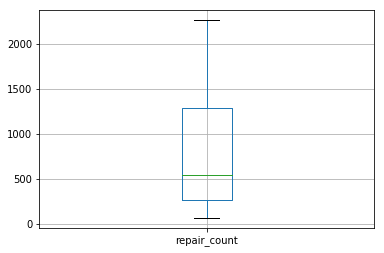

In [29]:
ax = major_part_overall_repair.boxplot()

In [30]:
major_part_dtc_summary = part_dtc_summary.loc[lambda df: df['repair_count'] >=5, ]

In [31]:
major_part_dtc_summary.sort_values('repair_count', ascending=False).head(10)

part_base           ecu_dtc  dtc_repair_count  repair_count  \
1317  9F593     0x7E0_P2240_0x00  1                 2263           
1289  9F593     0x7E0_P061A_0x00  4                 2263           
1269  9F593     0x7E0_P0357_0x00  2                 2263           
1270  9F593     0x7E0_P0358_0x00  2                 2263           
1271  9F593     0x7E0_P0365_0x00  2                 2263           
1272  9F593     0x7E0_P0369_0x00  2                 2263           
1273  9F593     0x7E0_P0390_0x00  1                 2263           
1274  9F593     0x7E0_P0394_0x00  1                 2263           
1275  9F593     0x7E0_P0406_0x00  1                 2263           
1276  9F593     0x7E0_P041C_0x00  2                 2263           

      normalized_repair_count  
1317  0.000442                 
1289  0.001768                 
1269  0.000884                 
1270  0.000884                 
1271  0.000884                 
1272  0.000884                 
1273  0.000442                 
1274  0.000442                 
1275  0.000442                 
1276  0.000884

#### check dtc count summary

In [32]:
dtc_count_summary = major_part_dtc_summary.groupby('ecu_dtc')['dtc_repair_count'].sum().to_frame(name='dtc_sum').reset_index()

In [33]:
dtc_count_summary.dtc_sum.describe()

count    597.000000
mean     15.182580 
std      58.653875 
min      1.000000  
25%      1.000000  
50%      3.000000  
75%      7.000000  
max      842.000000
Name: dtc_sum, dtype: float64

In [34]:
dtc_count_summary.sort_values('dtc_sum', ascending=False).head(10)

ecu_dtc  dtc_sum
15   0x706_C1001_0x97  842    
261  0x7E0_P0096_0x00  743    
416  0x7E0_P065B_0x00  492    
321  0x7E0_P0300_0x00  353    
408  0x7E0_P0625_0x00  311    
322  0x7E0_P0301_0x00  213    
327  0x7E0_P0306_0x00  202    
407  0x7E0_P0620_0x00  187    
325  0x7E0_P0304_0x00  178    
324  0x7E0_P0303_0x00  172

#### normalize the dtc repair count (major summary)

In [35]:
major_part_dtc_summary['normalized_repair_count']=major_part_dtc_summary['dtc_repair_count']/major_part_dtc_summary['repair_count']

In [36]:
major_part_dtc_pivot = major_part_dtc_summary.pivot(index='ecu_dtc',columns='part_base',values='normalized_repair_count')

In [37]:
major_part_dtc_pivot_df = major_part_dtc_pivot.fillna(0.0)

In [38]:
major_part_dtc_pivot_df.shape

(597, 11)

In [39]:
major_part_dtc_pivot_df.head(5)

part_base            10346    10C679    12A650    14A068     15604  9D370  \
ecu_dtc                                                                     
0x6F1_U0100_0x00  0.000000  0.000000  0.000000  0.002899  0.000000  0.0     
0x6F1_U0293_0x00  0.000000  0.000000  0.000000  0.002899  0.000000  0.0     
0x706_B120C_0x11  0.001332  0.000000  0.000000  0.000000  0.002857  0.0     
0x706_B120C_0x13  0.005326  0.015385  0.002622  0.002899  0.006667  0.0     
0x706_B13A6_0x14  0.000000  0.000000  0.000874  0.000000  0.000952  0.0     

part_base            9F479     9F593     9F972     9G756     9H307  
ecu_dtc                                                             
0x6F1_U0100_0x00  0.000000  0.000000  0.000000  0.000000  0.000000  
0x6F1_U0293_0x00  0.000000  0.000000  0.000000  0.000000  0.000000  
0x706_B120C_0x11  0.001404  0.000884  0.002320  0.000000  0.003650  
0x706_B120C_0x13  0.004912  0.002651  0.006961  0.005376  0.005474  
0x706_B13A6_0x14  0.000000  0.000884  0.002320  0.000000  0.001825

#### Use repairs with DTC data to build classification to build model input DF

In [40]:
ro_dtc_part_full.shape

(9064, 7)

In [41]:
### inner join with major part list
major_ro_dtc_part_df = ro_dtc_part_full.merge(major_part_overall_repair[['part_base']], 'inner')

In [42]:
major_ro_dtc_part_df.shape

(9064, 7)

In [43]:
len(set(list(major_ro_dtc_part_df['part_base'])))

11

In [44]:
major_ro_dtc_part_df['event'] = 1.0

In [45]:
major_ro_dtc_part_df['index'] = major_ro_dtc_part_df[['vin','ro_date','part_base']].apply(lambda x: ''.join(x), axis=1)
#remove part base from index column for multi-label application
#major_ro_dtc_part_df['index'] = major_ro_dtc_part_df[['vin','ro_date']].apply(lambda x: ''.join(x), axis=1)

In [46]:
major_ro_dtc_part_df.head(5)

vin  model_year        engine full_part_number part_base  \
0  1FTEW1C49KKC99052  2019        3.5L V6 GTDI  JL3Z12A650ARANP  12A650     
1  1FTEW1C49KKC99052  2019        3.5L V6 GTDI  JL3Z12A650ARANP  12A650     
2  1FTEW1C49KKC99052  2019        3.5L V6 GTDI  JL3Z12A650ARANP  12A650     
3  1FTEW1C49KKC99052  2019        3.5L V6 GTDI  JL3Z12A650ARANP  12A650     
4  1FTEW1C49KKC99052  2019        3.5L V6 GTDI  JL3Z12A650ARANP  12A650     

      ro_date           ecu_dtc  event                              index  
0  2020-10-19  0x706_C1001_0x78  1.0    1FTEW1C49KKC990522020-10-1912A650  
1  2020-10-19  0x706_C1001_0x54  1.0    1FTEW1C49KKC990522020-10-1912A650  
2  2020-10-19  0x706_U0418_0x86  1.0    1FTEW1C49KKC990522020-10-1912A650  
3  2020-10-19  0x7E0_P060D_0x00  1.0    1FTEW1C49KKC990522020-10-1912A650  
4  2020-10-19  0x760_U0401_0x00  1.0    1FTEW1C49KKC990522020-10-1912A650

In [47]:
# check duplicates on index column
a = major_ro_dtc_part_df.duplicated(subset='index', keep='first').sum()
print(a)

5199


In [48]:
#major_ro_dtc_part_pivot = major_ro_dtc_part_df.pivot(index='index',columns='ecu_dtc',values='event').reset_index()
major_ro_dtc_part_pivot = major_ro_dtc_part_df.pivot_table(index='index',columns='ecu_dtc',values='event').reset_index()

In [49]:
major_ro_dtc_part_pivot.shape

(3865, 598)

In [50]:
major_ro_dtc_part_pivot['RO'] = major_ro_dtc_part_pivot['index'].apply(lambda x: x[:27])
major_ro_dtc_part_pivot['part_number'] = major_ro_dtc_part_pivot['index'].apply(lambda x: x[27:])

In [51]:
major_ro_dtc_part_pivot.head(5)

ecu_dtc                             index  0x6F1_U0100_0x00  0x6F1_U0293_0x00  \
0        1FTEW1C41LKF245512021-01-159F479 NaN               NaN                 
1        1FTEW1C43KKC874942020-08-289H307 NaN               NaN                 
2        1FTEW1C44KFA297702019-07-2515604 NaN               NaN                 
3        1FTEW1C44KKE321712021-04-2610346 NaN               NaN                 
4        1FTEW1C44KKF290012020-07-139F593 NaN               NaN                 

ecu_dtc  0x706_B120C_0x11  0x706_B120C_0x13  0x706_B13A6_0x14  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x706_B1B36_0x08  0x706_B1B38_0x08  0x706_B1B40_0x08  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x706_B1B42_0x08  0x706_B1B44_0x08  0x706_B1B46_0x08  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x706_B1B48_0x08  0x706_B1B50_0x08  0x706_C1001_0x54  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x706_C1001_0x78  0x706_C1001_0x97  0x706_C1A67_0x08  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x706_U0100_0x00  0x706_U0101_0x00  0x706_U0121_0x00  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x706_U0151_0x00  0x706_U0158_0x00  0x706_U0212_0x00  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x706_U0401_0x86  0x706_U0405_0x64  0x706_U0418_0x86  \
0        1.0              NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN                 

ecu_dtc  0x706_U0420_0x86  0x706_U0429_0x86  0x706_U2100_0x00  \
0       NaN               NaN               NaN                 
1       NaN               NaN               NaN                 
2       NaN               NaN               NaN                 
3       NaN               NaN               NaN                 
4       NaN               NaN               NaN             

In [52]:
model_input_df = major_ro_dtc_part_pivot.iloc[:, 1:].fillna(0.0)

In [53]:
model_input_df.shape

(3865, 599)

In [54]:
model_input_df.head(5)

ecu_dtc  0x6F1_U0100_0x00  0x6F1_U0293_0x00  0x706_B120C_0x11  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x706_B120C_0x13  0x706_B13A6_0x14  0x706_B1B36_0x08  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x706_B1B38_0x08  0x706_B1B40_0x08  0x706_B1B42_0x08  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x706_B1B44_0x08  0x706_B1B46_0x08  0x706_B1B48_0x08  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x706_B1B50_0x08  0x706_C1001_0x54  0x706_C1001_0x78  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x706_C1001_0x97  0x706_C1A67_0x08  0x706_U0100_0x00  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x706_U0101_0x00  0x706_U0121_0x00  0x706_U0151_0x00  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x706_U0158_0x00  0x706_U0212_0x00  0x706_U0401_0x86  \
0        0.0               0.0               1.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x706_U0405_0x64  0x706_U0418_0x86  0x706_U0420_0x86  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x706_U0429_0x86  0x706_U2100_0x00  0x706_U2300_0x64  \
0        0.0               0.0               0.0                
1        0.0               0.0               0.0                
2        0.0               0.0               0.0                
3        0.0               0.0               0.0                
4        0.0               0.0               0.0                

ecu_dtc  0x706_U3000_0x49  0x706_U3000_0x64  0x706_U3003_0x16  \
0        0.0             

### Group by Part No and RO 

we want the unique parts number grouped by RO, not total occurence. One row should have uique DTC combo and part numbers repaired for ONE RO

In [55]:
col_list = model_input_df.columns.values
col_list = col_list[:-1]
col_list = col_list.tolist()
#col_list

In [56]:
grouped = model_input_df.groupby(col_list)['part_number'].unique().reset_index()

In [57]:
grouped.head(5)

0x6F1_U0100_0x00  0x6F1_U0293_0x00  0x706_B120C_0x11  0x706_B120C_0x13  \
0  0.0               0.0               0.0               0.0                
1  0.0               0.0               0.0               0.0                
2  0.0               0.0               0.0               0.0                
3  0.0               0.0               0.0               0.0                
4  0.0               0.0               0.0               0.0                

   0x706_B13A6_0x14  0x706_B1B36_0x08  0x706_B1B38_0x08  0x706_B1B40_0x08  \
0  0.0               0.0               0.0               0.0                
1  0.0               0.0               0.0               0.0                
2  0.0               0.0               0.0               0.0                
3  0.0               0.0               0.0               0.0                
4  0.0               0.0               0.0               0.0                

   0x706_B1B42_0x08  0x706_B1B44_0x08  0x706_B1B46_0x08  0x706_B1B48_0x08  \
0  0.0               0.0               0.0               0.0                
1  0.0               0.0               0.0               0.0                
2  0.0               0.0               0.0               0.0                
3  0.0               0.0               0.0               0.0                
4  0.0               0.0               0.0               0.0                

   0x706_B1B50_0x08  0x706_C1001_0x54  0x706_C1001_0x78  0x706_C1001_0x97  \
0  0.0               0.0               0.0               0.0                
1  0.0               0.0               0.0               0.0                
2  0.0               0.0               0.0               0.0                
3  0.0               0.0               0.0               0.0                
4  0.0               0.0               0.0               0.0                

   0x706_C1A67_0x08  0x706_U0100_0x00  0x706_U0101_0x00  0x706_U0121_0x00  \
0  0.0               0.0               0.0               0.0                
1  0.0               0.0               0.0               0.0                
2  0.0               0.0               0.0               0.0                
3  0.0               0.0               0.0               0.0                
4  0.0               0.0               0.0               0.0                

   0x706_U0151_0x00  0x706_U0158_0x00  0x706_U0212_0x00  0x706_U0401_0x86  \
0  0.0               0.0               0.0               0.0                
1  0.0               0.0               0.0               0.0                
2  0.0               0.0               0.0               0.0                
3  0.0               0.0               0.0               0.0                
4  0.0               0.0               0.0               0.0                

   0x706_U0405_0x64  0x706_U0418_0x86  0x706_U0420_0x86  0x706_U0429_0x86  \
0  0.0               0.0               0.0               0.0                
1  0.0               0.0               0.0               0.0                
2  0.0               0.0               0.0               0.0                
3  0.0               0.0               0.0               0.0                
4  0.0               0.0               0.0               0.0                

   0x706_U2100_0x00  0x706_U2300_0x64  0x706_U3000_0x49  0x706_U3000_0x64  \
0  0.0               0.0               0.0               0.0                
1  0.0               0.0               0.0               0.0                
2  0.0               0.0               0.0               0.0                
3  0.0               0.0               0.0               0.0                
4  0.0               0.0               0.0               0.0                

   0x706_U3003_0x16  0x706_U3003_0x17  0x720_U0415_0x82  0x720_U0424_0x00  \
0  0.0               0.0               0.0               0.0                
1  0.0               0.0               0.0               0.0                
2  0.0               0.0               0.0               0.0        

In [59]:
grouped.part_number[:10]

0    [14A068]             
1    [9D370, 9G756, 9H307]
2    [9F479]              
3    [9F479]              
4    [12A650]             
5    [12A650]             
6    [15604]              
7    [12A650]             
8    [14A068]             
9    [9F593, 9F972]       
Name: part_number, dtype: object

In [60]:
# Check DTC and part number for first row
d = [c for c in grouped.columns if grouped[c][0] == 1] 
print(d)
print(grouped['RO'][0])

['0x7E6_U0103_0x00']
1FTFW1ED5MFB153662021-06-29


In [61]:
major_ro_dtc_part_df[major_ro_dtc_part_df['ecu_dtc'] == '0x7E6_U0103_0x00']

vin  model_year   engine full_part_number part_base  \
2875  1FTFW1ED5MFB15366  2021        3.5L V6  ML3Z14A068N      14A068     
2891  1FTFW1ED0MFA44531  2021        3.5L V6  ML3Z14A068A      14A068     

         ro_date           ecu_dtc  event                              index  
2875  2021-06-29  0x7E6_U0103_0x00  1.0    1FTFW1ED5MFB153662021-06-2914A068  
2891  2021-02-15  0x7E6_U0103_0x00  1.0    1FTFW1ED0MFA445312021-02-1514A068

### Use Multi-label Binarizer to encode multi part labels

In [62]:
#importing MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
#instantiating MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [63]:
#Encode the multilabel data in MLB Format
part_no_mlb = mlb.fit_transform(grouped['part_number'])
part_no_mlb

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
part_no_mlb.shape

(3642, 11)

In [65]:
#check first row
part_no_mlb[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### Build classification models with RF

In [66]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler, LabelEncoder
#from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin

In [67]:
from sklearn.metrics import accuracy_score, jaccard_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [68]:
X_train, X_eval, y_train, y_eval = train_test_split(grouped.iloc[:,:-2], part_no_mlb, test_size = 0.2, random_state = 11)

In [69]:
clf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', min_samples_split = 3, min_samples_leaf = 1, max_features = 'auto')
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=3)

In [70]:
y_pred = clf.predict(X_eval)

In [71]:
y_prob = clf.predict_proba(X_eval)

##### exact match accuracy

In [72]:
accuracy_score(y_eval, y_pred)

0.6186556927297668

#### calculate part-wise recall, precision and f1-scores

In [109]:
partwise_recall = np.array([recall_score(y_eval[:, i], y_pred[:, i]) for i in range(y_eval.shape[1])])

In [110]:
partwise_recall

array([0.85      , 0.        , 0.35802469, 0.2173913 , 0.4040404 ,
       0.33333333, 0.94011976, 0.74509804, 0.19444444, 0.        ,
       0.42105263])

In [111]:
partwise_precision = np.array([precision_score(y_eval[:, i], y_pred[:, i]) for i in range(y_eval.shape[1])])

In [112]:
partwise_precision

array([0.91891892, 0.        , 0.56862745, 0.71428571, 0.70175439,
       0.8       , 0.96319018, 0.82608696, 0.53846154, 0.        ,
       0.70588235])

In [113]:
partwise_f1 = np.array([f1_score(y_eval[:, i], y_pred[:, i]) for i in range(y_eval.shape[1])])

In [114]:
partwise_f1

array([0.88311688, 0.        , 0.43939394, 0.33333333, 0.51282051,
       0.47058824, 0.95151515, 0.78350515, 0.28571429, 0.        ,
       0.52747253])

### Build Model using RF + Chain Classifier

In [93]:
from sklearn.multioutput import ClassifierChain

In [94]:
clf1 = RandomForestClassifier(n_estimators = 100, criterion = 'gini', min_samples_split = 3, min_samples_leaf = 1, max_features = 'auto')

In [95]:
chain = ClassifierChain(clf1, order='random', random_state=0)

In [96]:
chain.fit(X_train, y_train)

ClassifierChain(base_estimator=RandomForestClassifier(min_samples_split=3),
                order='random', random_state=0)

In [97]:
y_pred1 = chain.predict(X_eval)

In [98]:
y_prob1 = chain.predict_proba(X_eval)

#### exact match accuracy

In [99]:
accuracy_score(y_eval, y_pred1)

0.6502057613168725

#### calculate part-wise recall, precision and f1-scores

In [115]:
partwise_recall = np.array([recall_score(y_eval[:, i], y_pred1[:, i]) for i in range(y_eval.shape[1])])

In [116]:
partwise_recall

array([0.93333333, 0.        , 0.32098765, 0.43478261, 0.46464646,
       0.33333333, 0.94610778, 0.78431373, 0.27777778, 0.        ,
       0.45614035])

In [117]:
partwise_precision = np.array([precision_score(y_eval[:, i], y_pred1[:, i]) for i in range(y_eval.shape[1])])

In [118]:
partwise_precision

array([0.55445545, 0.        , 0.5       , 0.55555556, 0.68656716,
       0.8       , 0.94610778, 0.75471698, 0.4       , 0.        ,
       0.59090909])

In [119]:
partwise_f1 = np.array([f1_score(y_eval[:, i], y_pred1[:, i]) for i in range(y_eval.shape[1])])

In [120]:
partwise_f1

array([0.69565217, 0.        , 0.39097744, 0.48780488, 0.55421687,
       0.47058824, 0.94610778, 0.76923077, 0.32786885, 0.        ,
       0.51485149])

In [122]:
### alternatively, use the following formular to calculate F1 score
partwise_f1_alt = 2*partwise_recall*partwise_precision/(partwise_recall+partwise_precision+1E-10)

In [123]:
partwise_f1_alt

array([0.69565217, 0.        , 0.39097744, 0.48780488, 0.55421687,
       0.47058824, 0.94610778, 0.76923077, 0.32786885, 0.        ,
       0.51485149])

#### calculate aggregated macro and micro metrics

In [124]:
#### macro recall
## simple average of recall over all classes
recall_macro = np.mean(partwise_recall)

In [125]:
recall_macro

0.45012936662782504

In [126]:
precision_macro = np.mean(partwise_precision)

In [127]:
precision_macro

0.5262101837955927

In [128]:
f1_macro = np.mean(partwise_f1)

In [129]:
f1_macro

0.4688453172367529

In [130]:
#### micro recall
#### total number of TP / total number of True in y_true
recall_micro = sum([sum(np.logical_and(y_eval[:,i], y_pred1[:,i])) for i in range(y_eval.shape[1])]) / sum([sum(y_eval[:,i]) for i in range(y_eval.shape[1])])

In [131]:
recall_micro

0.6632124352331606

In [132]:
#### micro precision
#### total number of TP / total number of True in y_pred
precision_micro = sum([sum(np.logical_and(y_eval[:,i], y_pred1[:,i])) for i in range(y_eval.shape[1])]) / sum([sum(y_pred1[:,i]) for i in range(y_eval.shape[1])])

In [133]:
precision_micro

0.6909581646423751

In [134]:
f1_micro = 2*recall_micro*precision_micro/(recall_micro+precision_micro)

In [135]:
f1_micro

0.6768010575016524

### generate metrics report

In [136]:
### get number of parts in the evaluation set
num_part_eval = [sum(y_eval[:,i]) for i in range(y_eval.shape[1])]

In [137]:
num_part_eval

[120, 5, 81, 23, 99, 12, 167, 153, 36, 19, 57]

In [140]:
y_labels = mlb.classes_

In [148]:
report_df = pd.DataFrame(np.array([y_labels, num_part_eval, partwise_recall, partwise_precision, partwise_f1]).T, columns=['target', 'target_count', 'recall', 'precision', 'f1-score'])

In [149]:
report_df

target target_count    recall precision  f1-score
0   10346   120          0.933333  0.554455  0.695652
1   10C679  5            0         0         0       
2   12A650  81           0.320988  0.5       0.390977
3   14A068  23           0.434783  0.555556  0.487805
4   15604   99           0.464646  0.686567  0.554217
5   9D370   12           0.333333  0.8       0.470588
6   9F479   167          0.946108  0.946108  0.946108
7   9F593   153          0.784314  0.754717  0.769231
8   9F972   36           0.277778  0.4       0.327869
9   9G756   19           0         0         0       
10  9H307   57           0.45614   0.590909  0.514851

In [150]:
report_df = report_df.append({'target':'macro', 'target_count': '', 'recall':recall_macro, 'precision': precision_macro, 'f1-score':f1_macro}, ignore_index=True)

In [152]:
report_df = report_df.append({'target':'micro', 'target_count': '', 'recall':recall_micro, 'precision': precision_micro, 'f1-score':f1_micro}, ignore_index=True)

In [153]:
report_df

target target_count    recall precision  f1-score
0   10346   120          0.933333  0.554455  0.695652
1   10C679  5            0         0         0       
2   12A650  81           0.320988  0.5       0.390977
3   14A068  23           0.434783  0.555556  0.487805
4   15604   99           0.464646  0.686567  0.554217
5   9D370   12           0.333333  0.8       0.470588
6   9F479   167          0.946108  0.946108  0.946108
7   9F593   153          0.784314  0.754717  0.769231
8   9F972   36           0.277778  0.4       0.327869
9   9G756   19           0         0         0       
10  9H307   57           0.45614   0.590909  0.514851
11  macro                0.450129  0.52621   0.468845
12  micro                0.663212  0.690958  0.676801